
## Explore scikit-learn alorithms that predict continuous values


Additional required setup step:  "conda install xgboost"

## This take about *30 seconds* to run on my fairly new laptop

In [1]:

# Import required libraries 
# for loading CSV to pandas and numpy data types

import pandas as pd 
import numpy as np 

### Load the predictor and target data to a pandas dataframe


In [2]:
# read target df from local 
# target_df = pd.read_csv("dataframes/target_df.csv.gz", compression="infer", parse_dates = ["opday"])

# read target_df directly from github
target_df = pd.read_csv("https://github.com/k5dru/CPSC_5383/blob/main/dataframes/target_df.csv.gz?raw=true", compression="gzip", parse_dates = ["opday"])

### View the source data

Always view the source data.  Pandas makes this trivial.

In [3]:
target_df

,opday,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,...,HDD_TX_DALLAS_FT_WORTH_AP,HDD_TX_DALLAS_LOVE_FLD,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2,2015-10-03,566229.834662,0,0,1,0,0,0,0,0,...,0.00,0.00,1.05,5.28,0.00,0.00,0.00,3.30,18.24,16.98
3,2015-10-04,552166.723416,0,0,0,1,0,0,0,0,...,0.00,0.00,0.00,8.34,0.00,0.00,0.00,1.14,18.96,15.00
4,2015-10-05,596751.461994,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,7.44,1.14,0.00,0.00,1.14,12.30,7.08
5,2015-10-06,622735.355003,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,3.48,0.00,0.00,0.00,0.60,12.12,8.97
6,2015-10-07,645464.796588,0,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.44,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2019-12-27,686175.786000,1,0,0,0,0,0,0,0,...,3.84,1.50,3.48,17.16,7.08,2.94,4.38,11.76,39.84,41.82
1549,2019-12-28,648146.557000,0,0,1,0,0,0,0,0,...,2.94,1.32,6.99,15.18,7.26,3.12,2.58,6.36,41.64,37.77
1550,2019-12-29,661993.471000,0,0,0,1,0,0,0,0,...,14.82,13.02,18.96,27.24,21.30,17.70,13.02,20.94,47.58,39.84


In [4]:
target_df.describe()

,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,holiday_Christmas Eve,...,HDD_TX_DALLAS_FT_WORTH_AP,HDD_TX_DALLAS_LOVE_FLD,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP
count,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,...,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,7.178639e+05,0.142671,0.143974,0.142671,0.143322,0.141368,0.142671,0.143322,0.003909,0.003257,...,5.443349,5.159023,6.173375,8.910704,6.428717,5.824339,5.486463,7.879974,19.121863,18.240430
std,1.007130e+05,0.349851,0.351178,0.349851,0.350516,0.348514,0.349851,0.350516,0.062418,0.056999,...,8.633520,8.407970,9.136330,11.073380,9.305757,8.850519,8.568441,10.596462,15.683710,16.434591
min,5.400074e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.367939e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.480000,0.000000
50%,6.941424e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.760000,0.000000,0.000000,0.000000,0.960000,18.600000,16.890000
75%,7.862803e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.060000,8.340000,10.995000,16.620000,11.760000,10.500000,9.420000,14.190000,30.660000,29.850000
max,1.016596e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,42.000000,41.820000,44.970000,52.980000,46.860000,45.420000,44.520000,48.660000,69.540000,76.380000


In [5]:
target_df.columns


Index(['opday', 'sum_spp_load', 'is_Friday', 'is_Monday', 'is_Saturday',
       'is_Sunday', 'is_Thursday', 'is_Tuesday', 'is_Wednesday',
       'holiday_Christmas Day',
       ...
       'HDD_TX_DALLAS_FT_WORTH_AP', 'HDD_TX_DALLAS_LOVE_FLD',
       'HDD_TX_FT_WORTH_ALLIANCE_AP', 'HDD_TX_LUBBOCK',
       'HDD_TX_MIDLAND_ODESSA', 'HDD_TX_SAN_ANGELO', 'HDD_TX_WACO_RGNL_AP',
       'HDD_TX_WICHITA_FALLS_MUNI_AP', 'HDD_WY_CHEYENNE',
       'HDD_WY_TORRINGTON_MUNI_AP'],
      dtype='object', length=483)

## Selection of the predictor measures

and convert the predictors and target to a numpy matrix and vector respectively

Note only a subset of the predictors are used; these were chosen by the genetic feature selection algorithm



In [6]:
predictors_df = target_df[[

 # weekdays
    'is_Saturday', 'is_Sunday',
   # 'is_Thursday',
   # 'is_Friday', 'is_Monday', 'is_Tuesday', 'is_Wednesday',
  # various holidays
   # 'holiday_Christmas Day', 'holiday_Christmas Eve',
   # 'holiday_Day After Thanksgiving', 'holiday_Independence Day',
   # 'holiday_Labor Day', 'holiday_Memorial Day',
    'holiday_New Year\'s Day',
   # 'holiday_Thanksgiving', 
  # any holiday:
    'is_holiday',   
    
# best weather stations from genetic search:    
    'TAVG_KS_DODGE_CITY',
    'TAVG_LA_SHREVEPORT', 
    'TAVG_MO_SPRINGFIELD',
    'TAVG_NE_LINCOLN_MUNI_AP', 
    'TAVG_OK_LAWTON_MUNI_AP',
    'TAVG_WY_TORRINGTON_MUNI_AP',
    'TAVG_AR_FT_SMITH_RGNL_AP', 
    'TAVG_IA_SIOUX_CITY_GATEWAY_AP',  
    
    'TMIN_KS_DODGE_CITY',
    'TMIN_LA_SHREVEPORT', 
    'TMIN_MO_SPRINGFIELD',
    'TMIN_NE_LINCOLN_MUNI_AP', 
    'TMIN_OK_LAWTON_MUNI_AP',
    'TMIN_WY_TORRINGTON_MUNI_AP',
    'TMIN_AR_FT_SMITH_RGNL_AP', 
    'TMIN_IA_SIOUX_CITY_GATEWAY_AP',
    
    'TMAX_KS_DODGE_CITY',
    'TMAX_LA_SHREVEPORT', 
    'TMAX_MO_SPRINGFIELD',
    'TMAX_NE_LINCOLN_MUNI_AP', 
    'TMAX_OK_LAWTON_MUNI_AP',
    'TMAX_WY_TORRINGTON_MUNI_AP',
    'TMAX_AR_FT_SMITH_RGNL_AP', 
    'TMAX_IA_SIOUX_CITY_GATEWAY_AP',
    
# HDD and CDD on those stations also for linear models
    'HDD_KS_DODGE_CITY',
    'HDD_LA_SHREVEPORT', 
    'HDD_MO_SPRINGFIELD',
    'HDD_NE_LINCOLN_MUNI_AP', 
    'HDD_OK_LAWTON_MUNI_AP',
    'HDD_WY_TORRINGTON_MUNI_AP',
    'HDD_AR_FT_SMITH_RGNL_AP', 
    'HDD_IA_SIOUX_CITY_GATEWAY_AP',
    
    'CDD_KS_DODGE_CITY',
    'CDD_LA_SHREVEPORT', 
    'CDD_MO_SPRINGFIELD',
    'CDD_NE_LINCOLN_MUNI_AP', 
    'CDD_OK_LAWTON_MUNI_AP',
    'CDD_WY_TORRINGTON_MUNI_AP',
    'CDD_AR_FT_SMITH_RGNL_AP', 
    'CDD_IA_SIOUX_CITY_GATEWAY_AP',  

]].copy()

# everything:
# predictors_df = target_df.drop(['opday', 'sum_spp_load'], axis=1).copy()


In [7]:
# Try adding opday to a scaled float.  This will be very much like a sequence number - and will probably help -
# since electrical demand grows over time.  But we can try with and without. 

opdf = target_df[['opday']]
normalized_opdf=(opdf-opdf.min())/(opdf.max()-opdf.min())

# There may be a problem with this though - since close days are similar, the models may be using 
# the simiarity of close days to cheat.  What is this called in time-series data? 
# predictors_df['opday'] = normalized_opdf


## I have a question.
Since electrical demand has been growing over time for the last several years, my models fit better if I include some sort of sequence number that can be scaled to fit the growing demand over time.  I don't know if this is proper or not. If I use a sequece number, nearby values might tie together nearby (in time) days which would have similar conditions and similar demand, and not serve any predictive value.  I've tried many options and have concluded that including a sequential month number works well; it would tie together only days of the same month which have significant variation, but it would also grow slowly over time to model economic growth and increase in demand. What do you think?

In [8]:
# try "months since 2015"; this should work as well as opday if it is only modeling load growth over time 
predictors_df['opmonth'] = (target_df.opday.dt.year - 2015) * 12 + target_df.opday.dt.month 

In [9]:
predictor_names = predictors_df.columns.to_numpy()
predictors = predictors_df.to_numpy()

# only include status in the target array 
target = target_df['sum_spp_load'].to_numpy()

### Scale the predictors

Use sklearn.preprocessing to sacle each predictor to a value between -1 and 1.  The targets are already binary (really categorical with ncat=2) and represented as integers so they don't need to be scaled.  

Note: in project 1 there's a pandas call to scale every variable easily.  Try that also? 

Note2: I am still a bit uncomfortable about destroying the original ranges of the data. We must save these somehow/somewhere in order to be able to use new data with the model.

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(predictors)
#y = scaler.fit_transform(target.reshape(-1, 1))
#y = target
y = scaler.fit_transform(target.reshape(-1, 1)).ravel()


### Here would be the place to study correlation and covariance 

Correlation as visualized by Seaborn:

<AxesSubplot:>

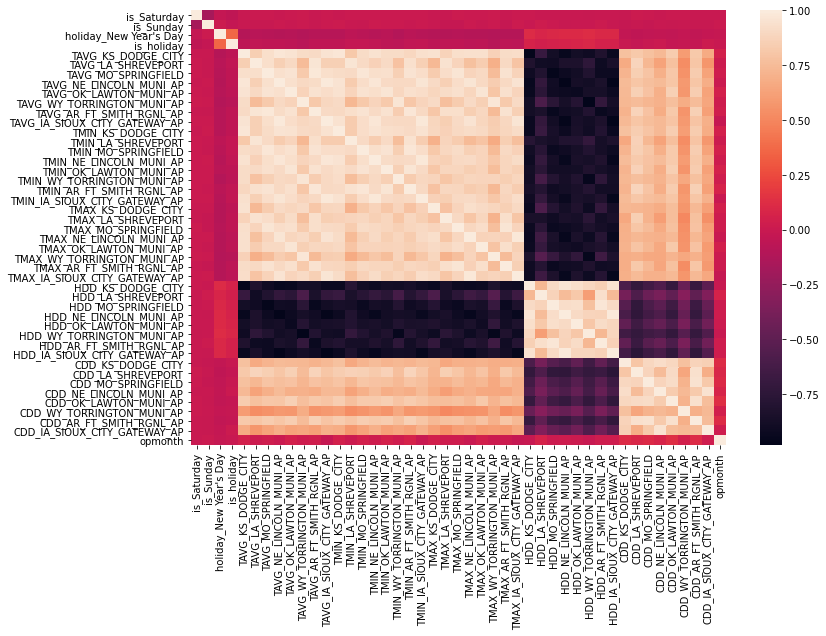

In [11]:
from pylab import plt
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(predictors_df.corr(),
           xticklabels=predictor_names,
           yticklabels=predictor_names)

### Split into training and testing sets

both the predictors and the targes, together, into a training set (75%) and a testing set (25%). Use constant random seed for repeatability but test with other random seeds to validate results.

## NOTE!  
Since the demand on adjacent days is similar, and I'm really interested in predicting new data as both "unseen" data and "future" data, I am NOT shuffling my training and test data, but instead training with the first majority of the data and testing with the following (future) days.

In [12]:
from sklearn.model_selection import train_test_split
# Since this is time-series data and we are ultimately interested in a models ability to predict future results, 
# set the training data to be the first 80% of the values, and let the test day be the last 20% (future) values.

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .237, random_state = 997)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .237, shuffle=False)

print (f"Input split into {len(y_train)} training observations and {len(y_test)} testing observations.")

Input split into 1171 training observations and 364 testing observations.


## Set up a reporting dataframe
for easy comparison of algorithms at the end

In [13]:
from sklearn import metrics

# use all the continuous regression metrics from 
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

report=pd.DataFrame(columns=['Algorithm', 'Explained Variance', 'R2/COD', 'Max Error', 'Mean AE', 
                             'Mean Squared Error', 'MAPE',
                             'Median AE'])

def add_to_report(rep, algorithm, y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    max_error = metrics.max_error(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
#    mean_squared_log_error = metrics.mean_squared_log_error(y_test, y_pred)
#    Mean Squared Logarithmic Error cannot be used when targets contain negative values.
    mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_test, y_pred)
    rep.loc[len(rep.index)] = [algorithm, explained_variance, r2_score, max_error, mean_absolute_error,
                              mean_squared_error, mean_absolute_percentage_error,
                              median_absolute_error]
    return rep


## Set up a standard plot to visualize predicted vs actual values


In [14]:
# scatter plot true vs. predicted values 
import pylab as pl
%matplotlib inline
from pylab import *

def myplot (algorithm, x_axis, y_axis):
    pl.figure(figsize=(8, 6), dpi=120)
    pl.scatter(x_axis, x_axis,  c="y", label='true', s=1)
    pl.scatter(x_axis, y_axis,  c="b", label=algorithm, s=1)
    pl.legend()
    pl.show()
    

## Try simple linear regression on the training data, and evaluate against the testing data

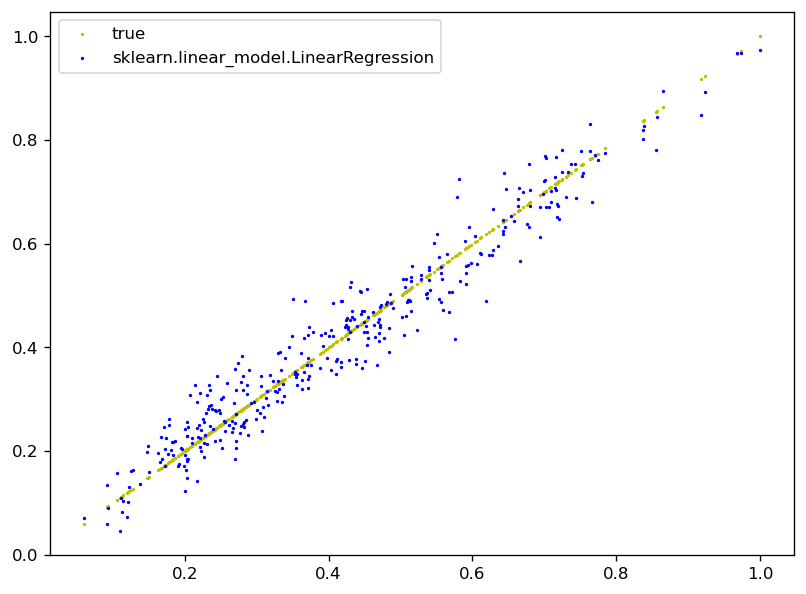

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,sklearn.linear_model.LinearRegression,0.945217,0.9452,0.160156,0.036539,0.002125,0.110327,0.030104


In [15]:
model_desc = 'sklearn.linear_model.LinearRegression'

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# show results
myplot(model_desc, y_test, y_pred )

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(2)

## Wow that seems very good!  Even a simple algorithm can perform quite well with good feature selection. 

## Show the coefficients of each feature
Since the data is normalized, this is similar to importance of the feature: 


In [16]:
pd.DataFrame(data = {'Predictor': predictor_names, 'Coef': model.coef_.round(3)}).sort_values(by='Coef', ascending=False).head(50)


,Predictor,Coef
9,TAVG_WY_TORRINGTON_MUNI_AP,1.865229e+08
32,HDD_OK_LAWTON_MUNI_AP,1.528051e+08
24,TMAX_OK_LAWTON_MUNI_AP,1.162189e+08
16,TMIN_OK_LAWTON_MUNI_AP,1.124471e+08
10,TAVG_AR_FT_SMITH_RGNL_AP,9.672788e+07
34,HDD_AR_FT_SMITH_RGNL_AP,6.402354e+07
5,TAVG_LA_SHREVEPORT,4.054912e+07
4,TAVG_KS_DODGE_CITY,3.731669e+07
7,TAVG_NE_LINCOLN_MUNI_AP,3.402034e+07
28,HDD_KS_DODGE_CITY,2.719143e+07


## I have no idea why the coefficients are so high.  Ideas? 

## Try sklearn.linear_model.SGDRegressor

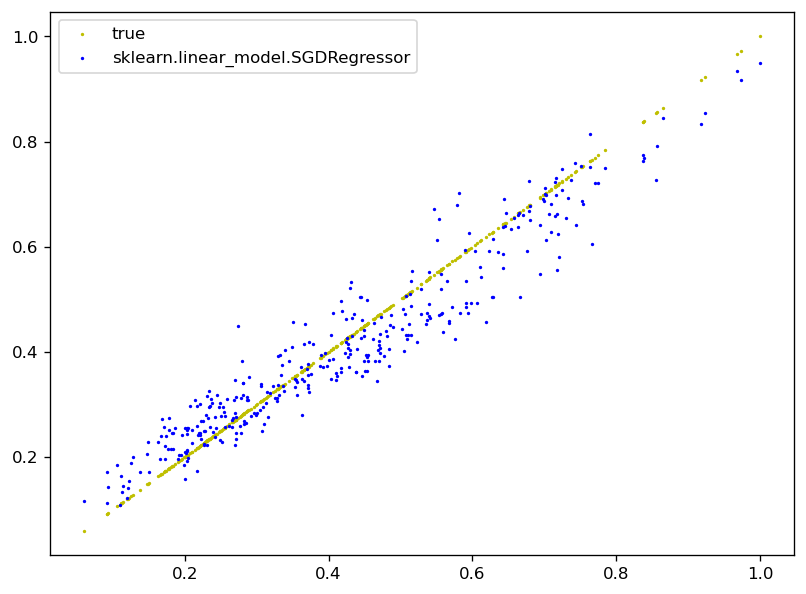

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,sklearn.linear_model.LinearRegression,0.945217,0.945200,0.160156,0.036539,0.002125,0.110327,0.030104
1,sklearn.linear_model.SGDRegressor,0.914042,0.912076,0.174178,0.046492,0.003410,0.135008,0.040167


In [17]:
model_desc = 'sklearn.linear_model.SGDRegressor'

from sklearn.linear_model import SGDRegressor
m = SGDRegressor()
model = m.fit(X_train, y_train)
# m.predict(X_test)
y_pred = model.predict(X_test)

# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Try sklearn.linear_model.HuberRegressor

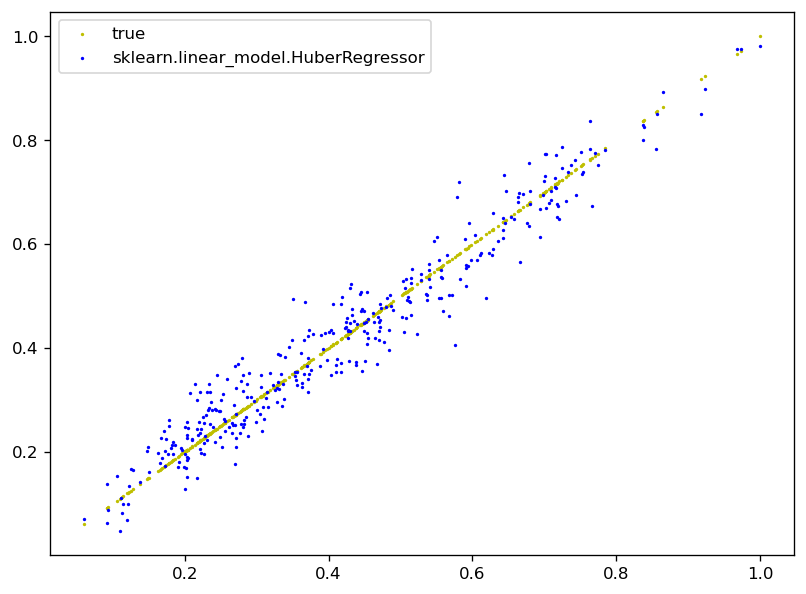

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,sklearn.linear_model.LinearRegression,0.945217,0.945200,0.160156,0.036539,0.002125,0.110327,0.030104
1,sklearn.linear_model.SGDRegressor,0.914042,0.912076,0.174178,0.046492,0.003410,0.135008,0.040167
2,sklearn.linear_model.HuberRegressor,0.944773,0.944685,0.169766,0.036555,0.002145,0.110845,0.029764


In [18]:
model_desc = 'sklearn.linear_model.HuberRegressor'

from sklearn.linear_model import HuberRegressor
m = HuberRegressor(max_iter=300)
model = m.fit(X_train, y_train)
# m.predict(testX)
y_pred = model.predict(X_test)


# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

In [19]:
pd.DataFrame(data = {'Predictor': predictor_names, 'Importance': model.coef_.round(3)}).sort_values(by='Importance', ascending=False).head(50)


,Predictor,Importance
29,HDD_LA_SHREVEPORT,0.218
40,CDD_OK_LAWTON_MUNI_AP,0.209
32,HDD_OK_LAWTON_MUNI_AP,0.160
38,CDD_MO_SPRINGFIELD,0.146
39,CDD_NE_LINCOLN_MUNI_AP,0.141
42,CDD_AR_FT_SMITH_RGNL_AP,0.138
41,CDD_WY_TORRINGTON_MUNI_AP,0.115
18,TMIN_AR_FT_SMITH_RGNL_AP,0.111
36,CDD_KS_DODGE_CITY,0.107
34,HDD_AR_FT_SMITH_RGNL_AP,0.099


## Try sklearn.linear_model.RANSACRegressor

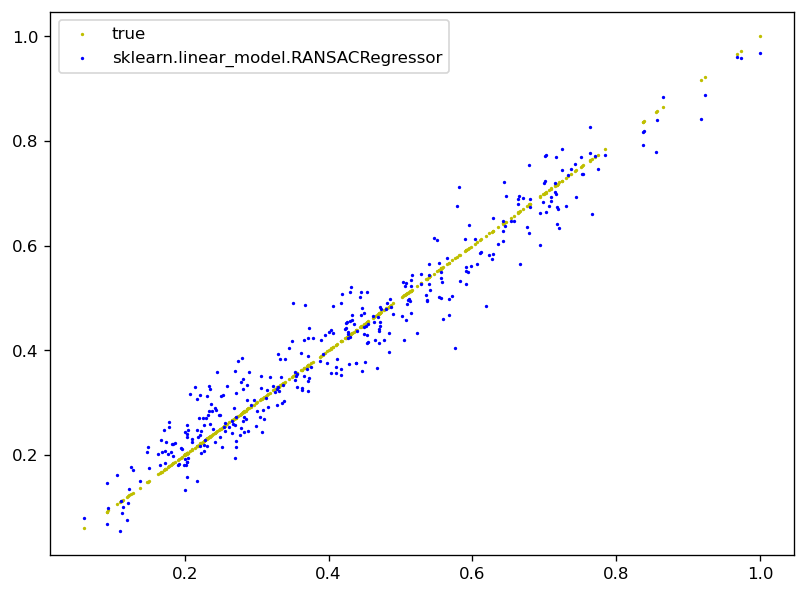

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
1,sklearn.linear_model.SGDRegressor,0.914042,0.912076,0.174178,0.046492,0.003410,0.135008,0.040167
2,sklearn.linear_model.HuberRegressor,0.944773,0.944685,0.169766,0.036555,0.002145,0.110845,0.029764
3,sklearn.linear_model.RANSACRegressor,0.943723,0.943589,0.171894,0.036857,0.002188,0.112265,0.030050


In [20]:
model_desc = 'sklearn.linear_model.RANSACRegressor'

from sklearn.linear_model import RANSACRegressor
m = RANSACRegressor()
model = m.fit(X_train, y_train)
# m.predict(testX)
y_pred = model.predict(X_test)


# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## TODO:  figure out PolynomialFeatures

something is wrong with this example from https://towardsdatascience.com/15-lesser-known-useful-sklearn-models-you-should-use-now-a1a566e680a6
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X_train)


## Try sklearn.svm.NuSVR 
This one worked so well even without HDD/CDD I used it in the genetic feature selection. 

It works better without the "opmonth" variable that models load-growth over time.

[LibSVM]{'C': 3.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.1, 'shrinking': True, 'tol': 0.001, 'verbose': True}


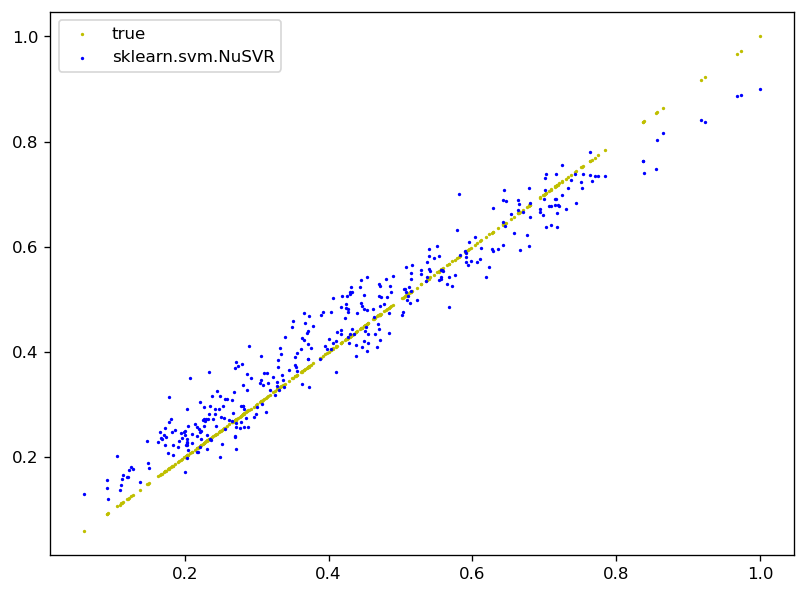

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
2,sklearn.linear_model.HuberRegressor,0.944773,0.944685,0.169766,0.036555,0.002145,0.110845,0.029764
3,sklearn.linear_model.RANSACRegressor,0.943723,0.943589,0.171894,0.036857,0.002188,0.112265,0.030050
4,sklearn.svm.NuSVR,0.945916,0.938270,0.142906,0.040015,0.002394,0.131267,0.035008


In [21]:
model_desc = 'sklearn.svm.NuSVR'

from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#regr = make_pipeline(StandardScaler(), NuSVR(C=3.0, nu=0.1)) #originally C=1.0, nu=1.0
regr = NuSVR(C=3.0, nu=0.1, verbose=True ) #originally C=1.0, nu=1.0

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# call regr.get_params() to see what parameters can be changed
print (regr.get_params())

# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## TODO:  fiture out what features are important to NuSVR -- how??

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.svm.NuSVR.html
https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR.predict_proba


## Try sklearn.ensemble.RandomForestRegressor

I've used this one before; it is a great performer


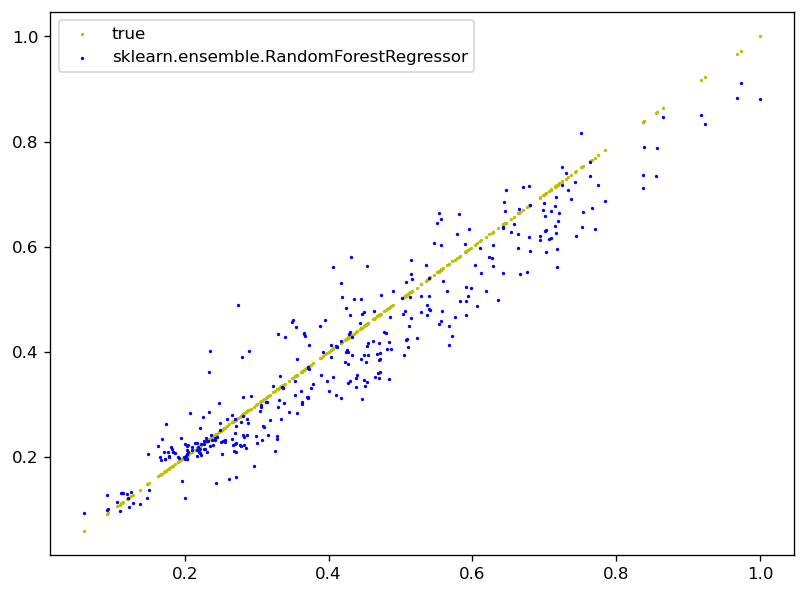

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
3,sklearn.linear_model.RANSACRegressor,0.943723,0.943589,0.171894,0.036857,0.002188,0.112265,0.030050
4,sklearn.svm.NuSVR,0.945916,0.938270,0.142906,0.040015,0.002394,0.131267,0.035008
5,sklearn.ensemble.RandomForestRegressor,0.907167,0.894290,0.214852,0.050547,0.004099,0.129309,0.042680


In [22]:
model_desc = 'sklearn.ensemble.RandomForestRegressor'

    # potential parameters
# n_estimators=100,
# *, criterion='squared_error', max_depth=None,
# min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features='auto', 
# max_leaf_nodes=None, min_impurity_decrease=0.0,
# bootstrap=True, oob_score=False, n_jobs=None, 
# random_state=None, verbose=0, warm_start=False, 
# ccp_alpha=0.0, max_samples=None)

from sklearn import ensemble

reg = ensemble.RandomForestRegressor(n_estimators=200)
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Try xgboost.XGBRegressor

Not technically a part of scikit-learn, but can be used with the same primitives.

Reference:  https://machinelearningmastery.com/xgboost-for-regression/


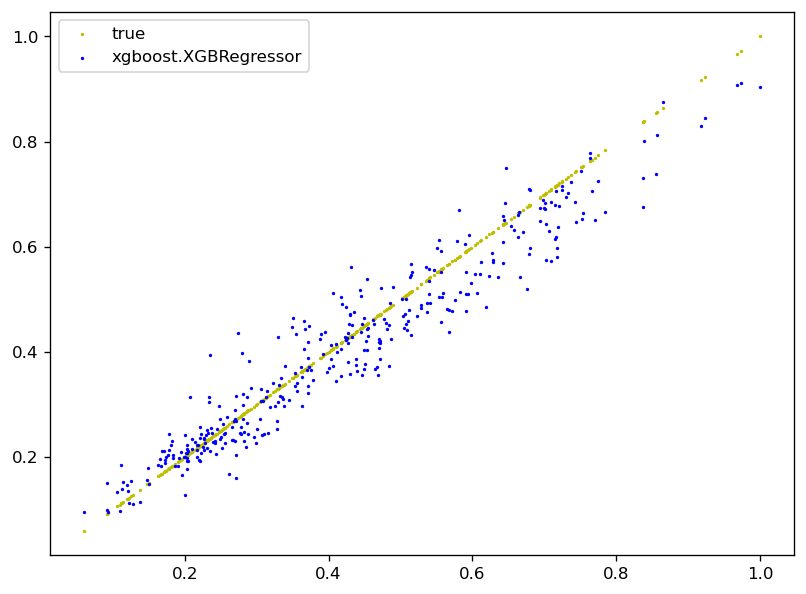

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
4,sklearn.svm.NuSVR,0.945916,0.938270,0.142906,0.040015,0.002394,0.131267,0.035008
5,sklearn.ensemble.RandomForestRegressor,0.907167,0.894290,0.214852,0.050547,0.004099,0.129309,0.042680
6,xgboost.XGBRegressor,0.928186,0.922434,0.161253,0.042456,0.003008,0.111892,0.034196


In [23]:
model_desc = 'xgboost.XGBRegressor'

# evaluate an xgboost regression model 
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
# evaluate model
# scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

# predict unseen data: 
y_pred = model.predict(X_test)


# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Try scikit-learn's built in ensemble method sklearn.ensemble.GradientBoostingRegressor

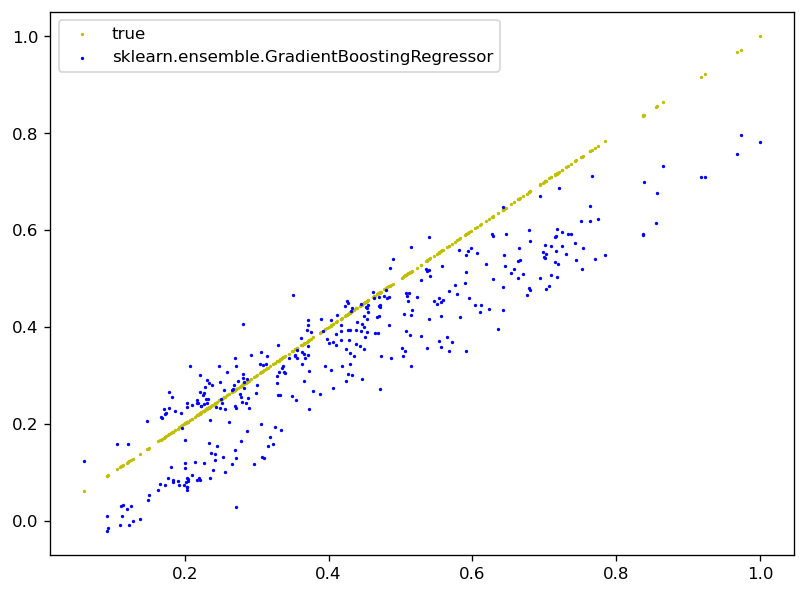

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
5,sklearn.ensemble.RandomForestRegressor,0.907167,0.894290,0.214852,0.050547,0.004099,0.129309,0.042680
6,xgboost.XGBRegressor,0.928186,0.922434,0.161253,0.042456,0.003008,0.111892,0.034196
7,sklearn.ensemble.GradientBoostingRegressor,0.834753,0.701822,0.245857,0.087014,0.011563,0.244264,0.078690


In [24]:
model_desc = 'sklearn.ensemble.GradientBoostingRegressor'

from sklearn import ensemble
params = {
    "n_estimators": 1000, # was 500
    "max_depth": 4,
    "min_samples_split": 7,  # was 5
    "learning_rate": 0.03, # was 0.01
 #   "loss": "deviance",
}
# for XGBoost we used n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

reg = ensemble.GradientBoostingRegressor(**params)
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)


# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

### Show the importance of each feature

This is one of the best performing classifiers; picking features based on importance to this model may be helpful

In [25]:
pd.DataFrame(data = {'Predictor': predictor_names, 'Importance': model.feature_importances_.round(3)}).sort_values(by='Importance', ascending=False).head(30)


,Predictor,Importance
8,TAVG_OK_LAWTON_MUNI_AP,0.239
40,CDD_OK_LAWTON_MUNI_AP,0.210
6,TAVG_MO_SPRINGFIELD,0.092
10,TAVG_AR_FT_SMITH_RGNL_AP,0.057
36,CDD_KS_DODGE_CITY,0.052
38,CDD_MO_SPRINGFIELD,0.051
4,TAVG_KS_DODGE_CITY,0.038
34,HDD_AR_FT_SMITH_RGNL_AP,0.032
42,CDD_AR_FT_SMITH_RGNL_AP,0.028
35,HDD_IA_SIOUX_CITY_GATEWAY_AP,0.019


## Report on all the models we have tried

Order by R2 / Coefficient of Determination

In [26]:
# Best performing models: 
report.sort_values(by='R2/COD', ignore_index=True, ascending=False)


,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,sklearn.linear_model.LinearRegression,0.945217,0.945200,0.160156,0.036539,0.002125,0.110327,0.030104
1,sklearn.linear_model.HuberRegressor,0.944773,0.944685,0.169766,0.036555,0.002145,0.110845,0.029764
2,sklearn.linear_model.RANSACRegressor,0.943723,0.943589,0.171894,0.036857,0.002188,0.112265,0.030050
3,sklearn.svm.NuSVR,0.945916,0.938270,0.142906,0.040015,0.002394,0.131267,0.035008
4,xgboost.XGBRegressor,0.928186,0.922434,0.161253,0.042456,0.003008,0.111892,0.034196
5,sklearn.linear_model.SGDRegressor,0.914042,0.912076,0.174178,0.046492,0.003410,0.135008,0.040167
6,sklearn.ensemble.RandomForestRegressor,0.907167,0.894290,0.214852,0.050547,0.004099,0.129309,0.042680
7,sklearn.ensemble.GradientBoostingRegressor,0.834753,0.701822,0.245857,0.087014,0.011563,0.244264,0.078690


# TODO:  learn how to do K-folds evaluation while fitting on all the continuous models 
as in https://machinelearningmastery.com/xgboost-for-regression/ - he uses kfolds for evaluation, but it doens't impact fitting

## Next, try some deeper learning methods